# Trying Scikit Learn's LDA

In [25]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from matplotlib.colors import ListedColormap

df = pd.read_csv('../hurwitzlab/data_sets/HMP_V13_OTU_counts.csv')
df = df.drop(columns = ['PSN'])

In [2]:
frequency_table = df.values

In [3]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)

lda.fit(frequency_table)

topic_distributions = lda.transform(frequency_table)

In [4]:
print("Topic distributions for each document:")
print(topic_distributions)

Topic distributions for each document:
[[5.62419733e-05 9.99775755e-01 5.52640730e-05 5.75004490e-05
  5.52387371e-05]
 [1.29435152e-05 9.99948217e-01 1.29472113e-05 1.29434898e-05
  1.29488239e-05]
 [1.92097386e-01 9.86484699e-04 4.79181676e-03 8.02104294e-01
  2.00193457e-05]
 ...
 [3.47555291e-04 9.94412795e-01 3.38495628e-05 1.81344857e-04
  5.02445506e-03]
 [1.06718365e-01 7.54536169e-02 6.92563551e-01 2.37259238e-02
  1.01538543e-01]
 [1.60972197e-02 2.08900423e-03 5.82296072e-01 6.21296155e-02
  3.37388089e-01]]


In [5]:
vocab = df.columns
taxonomy = pd.read_csv('../hurwitzlab/data_sets/HMP_V13_taxonomy_fix.csv')

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        row = taxonomy[taxonomy['OTU_ID'] == t[0]]
        if not row.empty:
            print(row.iat[0, 6], end=" ")
        else:
            print("Not Found", end=" ")
    print("\n")

Topic 0: 
Streptococcaceae Streptococcaceae Streptococcaceae Gemellaceae Burkholderiaceae Streptococcaceae Streptococcaceae Neisseriaceae Neisseriaceae Streptococcaceae 

Topic 1: 
Lactobacillaceae Lactobacillaceae Lactobacillaceae Lactobacillaceae Lactobacillaceae Lactobacillaceae Bacteroidaceae Lactobacillaceae Lactobacillaceae Lactobacillaceae 

Topic 2: 
Staphylococcaceae Lactobacillaceae Staphylococcaceae Burkholderiaceae nan Staphylococcaceae Staphylococcaceae Staphylococcaceae Carnobacteriaceae Staphylococcaceae 

Topic 3: 
Veillonellaceae Campylobacteraceae Neisseriaceae Veillonellaceae Streptococcaceae Carnobacteriaceae Streptococcaceae Veillonellaceae Neisseriaceae Prevotellaceae 

Topic 4: 
Propionibacteriaceae Propionibacteriaceae Staphylococcaceae Propionibacteriaceae Propionibacteriaceae Propionibacteriaceae Propionibacteriaceae Propionibacteriaceae Propionibacteriaceae Propionibacteriaceae 



In [6]:
body_sites = pd.read_csv('../hurwitzlab/data_sets/HMP_V13_participant_data.csv')

strongest_topic_indices = topic_distributions.argmax(axis=1)

body_sites['Strongest_Topic'] = strongest_topic_indices

topic_counts_by_site = body_sites.groupby(['HMP_BODY_SITE', 'Strongest_Topic']).size().unstack(fill_value=0)

print(topic_counts_by_site)

Strongest_Topic           0    1    2    3    4
HMP_BODY_SITE                                  
Airways                   0    2  135    2   22
Gastrointestinal Tract    1  185    0    0    1
Oral                    824    1    3  792    2
Skin                      7   19  229    3  406
Urogenital Tract          3  227   34    0    0


In [7]:
LDA_mapping = {site: idx for idx, site in enumerate(body_sites['Strongest_Topic'].unique())}

LDA_ints = body_sites['Strongest_Topic'].map(LDA_mapping)

body_site_mapping = {site: idx for idx, site in enumerate(body_sites['HMP_BODY_SITE'].unique())}

body_site_ints = body_sites['HMP_BODY_SITE'].map(body_site_mapping)

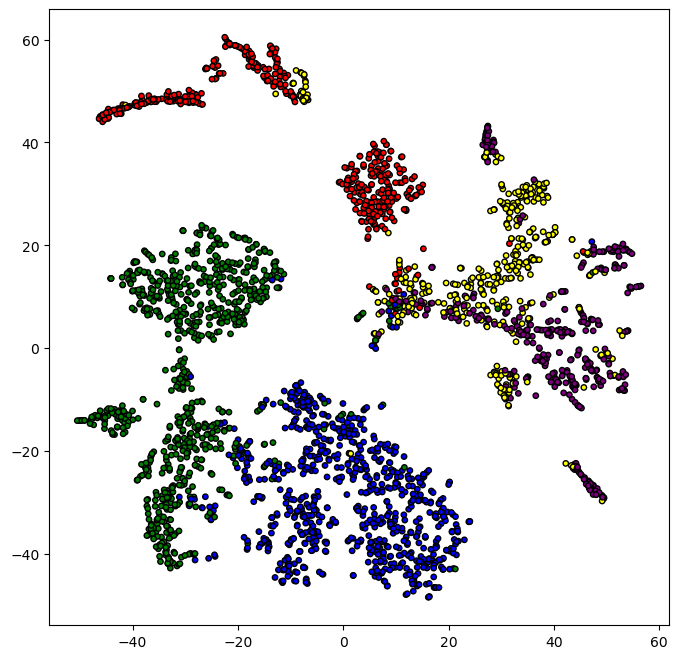

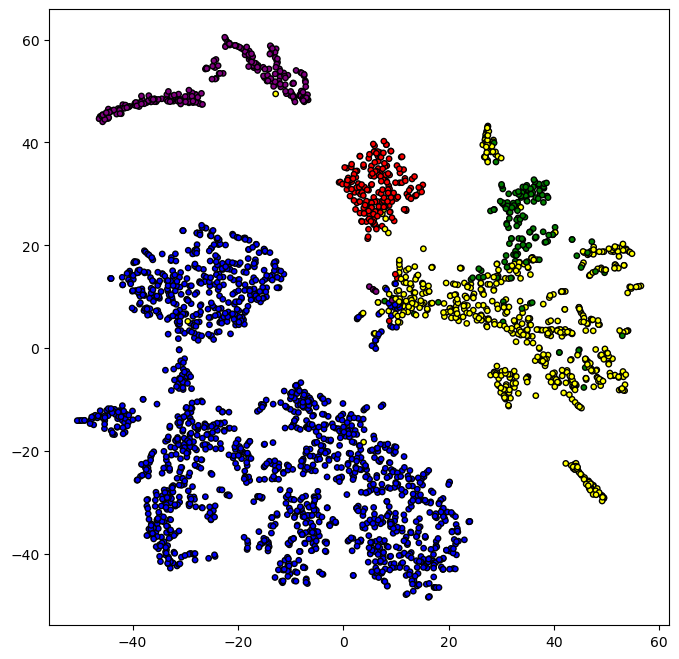

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Initial dimensionality reduction
pca = PCA(n_components=50)
reduced_df = pca.fit_transform(scaled_df)

# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(reduced_df)

# Plot with LDA (5 components)
custom_colors = ['red', 'blue', 'green', 'yellow', 'purple']
cmap = ListedColormap(custom_colors)

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=LDA_ints, cmap=cmap, edgecolor='k', s=15)
plt.savefig("5_comp_plot.svg")
plt.show()

# Plot with body sites
# Red = gut, blue = oral, green = airways, yellow = skin, purple = urogenital
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
scatter = plt.scatter(result[:, 0], result[:, 1], c=body_site_ints, cmap=cmap, edgecolor='k', s=15)
plt.savefig("body_site_plot.svg")
plt.show()

In [12]:
#processing df to only be mouth sites

df['body_sites'] = body_sites['HMP_BODY_SITE']

df = df[df['body_sites'] == 'Oral']

df = df.drop(columns=['body_sites'])

In [23]:
body_sites = body_sites[body_sites['HMP_BODY_SITE'] == 'Oral']

In [13]:
frequency_table = df.values

lda = LatentDirichletAllocation(n_components=10, random_state=0)

lda.fit(frequency_table)

topic_distributions = lda.transform(frequency_table)

In [14]:
print("Topic distributions for each document:")
print(topic_distributions)

Topic distributions for each document:
[[1.14968820e-01 1.00074821e-05 4.89280394e-02 ... 1.00096677e-05
  5.36308723e-03 5.22147277e-02]
 [2.94959363e-02 1.10989297e-05 1.52925769e-02 ... 1.10979558e-05
  9.37611641e-03 1.10978464e-05]
 [5.13937598e-01 1.84144623e-05 1.84161789e-05 ... 1.84140665e-05
  1.14245630e-01 1.84161692e-05]
 ...
 [2.15355663e-05 1.77954838e-01 2.15389458e-05 ... 2.84523872e-04
  2.15362994e-05 2.98721676e-03]
 [1.88418676e-02 2.61437140e-05 9.52505105e-01 ... 2.61407450e-05
  2.61421384e-05 1.41106619e-02]
 [1.06134676e-02 2.42331489e-05 5.90191009e-01 ... 2.42320358e-05
  2.42354435e-05 4.41656225e-02]]


In [15]:
for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        row = taxonomy[taxonomy['OTU_ID'] == t[0]]
        if not row.empty:
            print(row.iat[0, 6], end=" ")
        else:
            print("Not Found", end=" ")
    print("\n")

Topic 0: 
Streptococcaceae Streptococcaceae Streptococcaceae Gemellaceae Streptococcaceae Streptococcaceae Streptococcaceae Streptococcaceae Streptococcaceae Streptococcaceae 

Topic 1: 
Neisseriaceae Veillonellaceae Neisseriaceae Porphyromonadaceae Fusobacteriaceae Neisseriaceae Veillonellaceae Veillonellaceae Neisseriaceae Porphyromonadaceae 

Topic 2: 
Burkholderiaceae Neisseriaceae Neisseriaceae Streptococcaceae Flavobacteriaceae Burkholderiaceae Flavobacteriaceae Neisseriaceae Streptococcaceae Flavobacteriaceae 

Topic 3: 
Veillonellaceae Veillonellaceae Streptococcaceae Streptococcaceae Carnobacteriaceae Veillonellaceae Campylobacteraceae Prevotellaceae Prevotellaceae Veillonellaceae 

Topic 4: 
Prevotellaceae Campylobacteraceae Prevotellaceae Fusobacteriaceae Campylobacteraceae Fusobacteriaceae Fusobacteriaceae Pasteurellaceae Fusobacteriaceae Porphyromonadaceae 

Topic 5: 
Streptococcaceae Streptococcaceae Neisseriaceae Prevotellaceae Carnobacteriaceae Prevotellaceae Streptococ

In [24]:
strongest_topic_indices = topic_distributions.argmax(axis=1)

body_sites['Strongest_Topic'] = strongest_topic_indices

topic_counts_by_site = body_sites.groupby(['HMP_BODY_SUBSITE', 'Strongest_Topic']).size().unstack(fill_value=0)

print(topic_counts_by_site)

Strongest_Topic                0   1    2   3   4   5   6   7   8   9
HMP_BODY_SUBSITE                                                     
Attached Keratinized Gingiva  58   0    7   4   3  67   0   0  42   0
Buccal Mucosa                 85   9   11   8   0   6   3   0  60   1
Hard Palate                   40  51    2  58   0   2   3   0  21   1
Palatine Tonsils               6  61    1  48  17   0   1  14  10  28
Saliva                         1  45    7  26   0   0  15   8   2  58
Subgingival Plaque             1   0  123   1  51   0   0   4   2   1
Supragingival Plaque           0   0  178   0   9   0   0   2   0   0
Throat                         4  47    2  45   1   0   5   7  10  49
Tongue Dorsum                  0  80    0  86   0   0   0   1   1  22


/var/folders/mr/fcr4_q2x7r92n0ld8cqw51g00000gn/T/ipykernel_1148/1606573646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_sites['Strongest_Topic'] = strongest_topic_indices


# LDA on various taxonomic groupings (save table and graph)
# Find optimal number of components at each taxonomic group
# Implement prevalence filter